In [14]:
import pandas as pd
import seaborn as sns; sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import os
from IPython import display
from PIL import Image

### Metrics report

In [15]:
df = pd.DataFrame()

In [16]:
data_list = os.listdir("results/regular/")

In [17]:
for data in data_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/regular/" + data)
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)

In [11]:
#vqc_list = os.listdir("")
vqc_df = pd.read_csv("vqc_results/final/vqc.csv")
df = pd.concat([df, vqc_df], axis = 0).reset_index(drop=True)

In [18]:
df = df.fillna(0)
df

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed,tau,C
0,0.796163,0.806242,0.758430,0.747748,0.860488,0.851282,Decision Tree,0.013647,0.0,0.0
1,0.729927,0.731336,0.751304,0.756534,0.712401,0.705128,Logistic Regression,0.107585,0.0,0.0
2,0.771892,0.767375,0.656580,0.667290,0.923153,0.915385,Naive Bayes,0.006702,0.0,0.0
3,0.796094,0.798291,0.721438,0.721124,0.893470,0.888462,SVC,2.179139,0.0,0.0
4,0.713838,0.714263,0.691027,0.697674,0.739116,0.730769,Pegasos QSVC,659.484210,300.0,100.0
5,0.793020,0.810248,0.765552,0.747166,0.860488,0.844872,Random Forest,0.210527,0.0,0.0


In [19]:
f1 = df[["model", "f1_train", "f1_test"]]
f1

,model,f1_train,f1_test
0,Decision Tree,0.806242,0.796163
1,Logistic Regression,0.731336,0.729927
2,Naive Bayes,0.767375,0.771892
3,SVC,0.798291,0.796094
4,Pegasos QSVC,0.714263,0.713838
5,Random Forest,0.810248,0.793020


In [20]:
prec = df[["model", "prec_train", "prec_test"]]
prec

,model,prec_train,prec_test
0,Decision Tree,0.758430,0.747748
1,Logistic Regression,0.751304,0.756534
2,Naive Bayes,0.656580,0.667290
3,SVC,0.721438,0.721124
4,Pegasos QSVC,0.691027,0.697674
5,Random Forest,0.765552,0.747166


In [22]:
recall = df[["model", "recall_train", "recall_test"]]
recall

,model,recall_train,recall_test
0,Decision Tree,0.860488,0.851282
1,Logistic Regression,0.712401,0.705128
2,Naive Bayes,0.923153,0.915385
3,SVC,0.893470,0.888462
4,Pegasos QSVC,0.739116,0.730769
5,Random Forest,0.860488,0.844872


### Confusion Matrix Report

In [23]:
conf_list = os.listdir("conf")
for conf in conf_list:
    if "png" not in conf:
        conf_list.remove(conf)
conf_list

['Decision_Tree_Classfier_Test.png',
 'svc.png',
 'nb.png',
 'lr.png',
 '.ipynb_checkpoints',
 'qsvc.png',
 'Random_Forest_Classfier_Test.png',
 'Random_Forest_Classfier_Train.png',
 'Random_Forest_Classfier_Validate.png']

In [11]:
for i in range(len(conf_list)):
    if ".png" in conf_list[i]:
        conf_list[i] = "conf/" + conf_list[i]
conf_list

['conf/svc.png',
 'conf/nb.png',
 'conf/lr.png',
 '.ipynb_checkpoints',
 'conf/qsvc.png']

In [12]:
conf_list.append("conf/pegasos_conf_test/100_500.png")
conf_list.append("vqc_conf/vqc_best.png")

In [13]:
conf_list.remove(".ipynb_checkpoints")
conf_list

['conf/svc.png',
 'conf/nb.png',
 'conf/lr.png',
 'conf/qsvc.png',
 'conf/pegasos_conf_test/100_500.png',
 'vqc_conf/vqc_best.png']

### SVC Family Report

In [14]:
feature_list = os.listdir("results/runtime_features/")
feature_df = pd.DataFrame()
for data in feature_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/runtime_features/" + data)
        feature_df = pd.concat([feature_df, new_df], axis = 0).reset_index(drop=True)

In [15]:
def svc_chart_gen_features():
    svc = feature_df[feature_df["model"].isin(["SVC_linear", "SVC_rbf"])]
    qsvc = feature_df[feature_df["model"]=="QSVC"]
    pegasos_qsvc = feature_df[feature_df["model"] =="Pegasos QSVC"]
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (20, 10))
    sns.lineplot(x = "num_features", y = "runtime", data = svc, hue = "model", ax = axes[0], marker="o")
    ax=axes[0]
    ax.set_title("SVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)
    #sns.lineplot(x = "num_features", y = "runtime", data = qsvc, ax = axes[0,0])
    sns.lineplot(x = "num_features", y = "runtime", data = pegasos_qsvc, ax = axes[1], marker="o")
    ax = axes[1]
    ax.set_title("Pegasos QSVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)

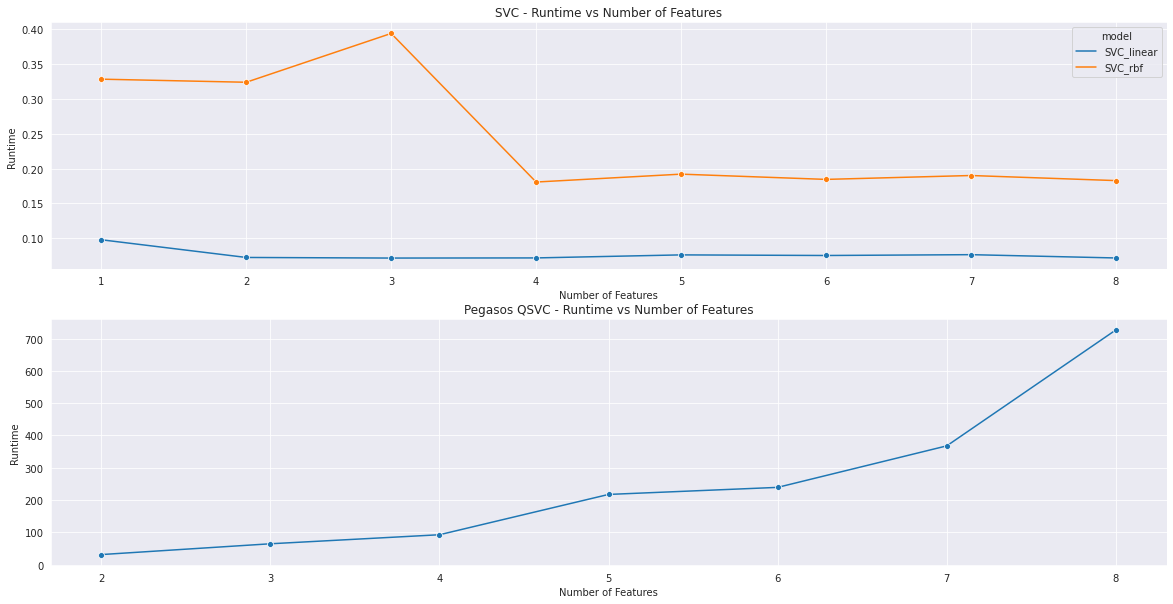

In [16]:
svc_chart_gen_features()

In [17]:
size_list = os.listdir("results/runtime_size/")
size_df = pd.DataFrame()
for data in size_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/runtime_size/" + data)
        size_df = pd.concat([size_df, new_df], axis = 0).reset_index(drop=True)

In [18]:
size_df

,size,model,runtime
0,266.6,SVC_linear,0.021847
1,533.2,SVC_linear,0.008818
2,799.8,SVC_linear,0.013061
3,1066.4,SVC_linear,0.017544
4,1333.0,SVC_linear,0.027383
5,1599.6,SVC_linear,0.033947
6,1866.2,SVC_linear,0.035756
7,2132.8,SVC_linear,0.050043
8,2399.4,SVC_linear,0.063104
9,2666.0,SVC_linear,0.071836


In [19]:
def svc_chart_gen_size():
    svc = size_df[size_df["model"].isin(["SVC_linear", "SVC_rbf"])]
    qsvc = size_df[size_df["model"]=="QSVC"]
    pegasos_qsvc = size_df[size_df["model"] =="Pegasos QSVC"]
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (20, 10))
    sns.lineplot(x = "size", y = "runtime", data = svc, hue = "model", ax = axes[0], marker = "o")
    ax=axes[0]
    ax.set_title("SVC - Runtime vs Number of observations")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)
    #sns.lineplot(x = "num_sizes", y = "runtime", data = qsvc, ax = axes[0,0])
    sns.lineplot(x = "size", y = "runtime", data = pegasos_qsvc, ax = axes[1], marker="o")
    ax = axes[1]
    ax.set_title("Pegasos QSVC - Runtime vs Number of observations")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)

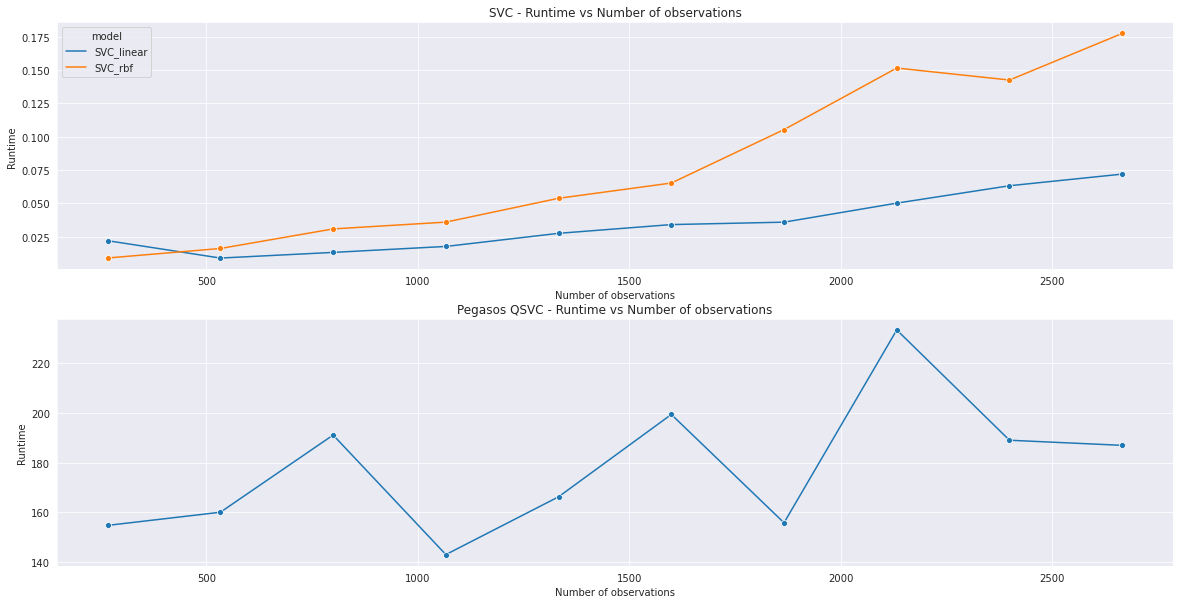

In [20]:
svc_chart_gen_size()

### VQC Report

In [21]:
vqc_feature_list = os.listdir("vqc_results/runtime_features/")
vqc_feature_df = pd.DataFrame()
for data in vqc_feature_list:
    if ".csv" in data:
        new_df = pd.read_csv("vqc_results/runtime_features/" + data)
        vqc_feature_df = pd.concat([vqc_feature_df, new_df], axis = 0).reset_index(drop=True)

In [22]:
vqc_feature_df

,num_features,model,runtime
0,2.0,vqc_su2_cobyla,2716.385718
1,3.0,vqc_su2_cobyla,4082.625291
2,4.0,vqc_su2_cobyla,5875.295516
3,5.0,vqc_su2_cobyla,10320.964926
4,6.0,vqc_su2_cobyla,13960.750234
5,7.0,vqc_su2_cobyla,18583.640273
6,8.0,vqc_su2_cobyla,28602.946099


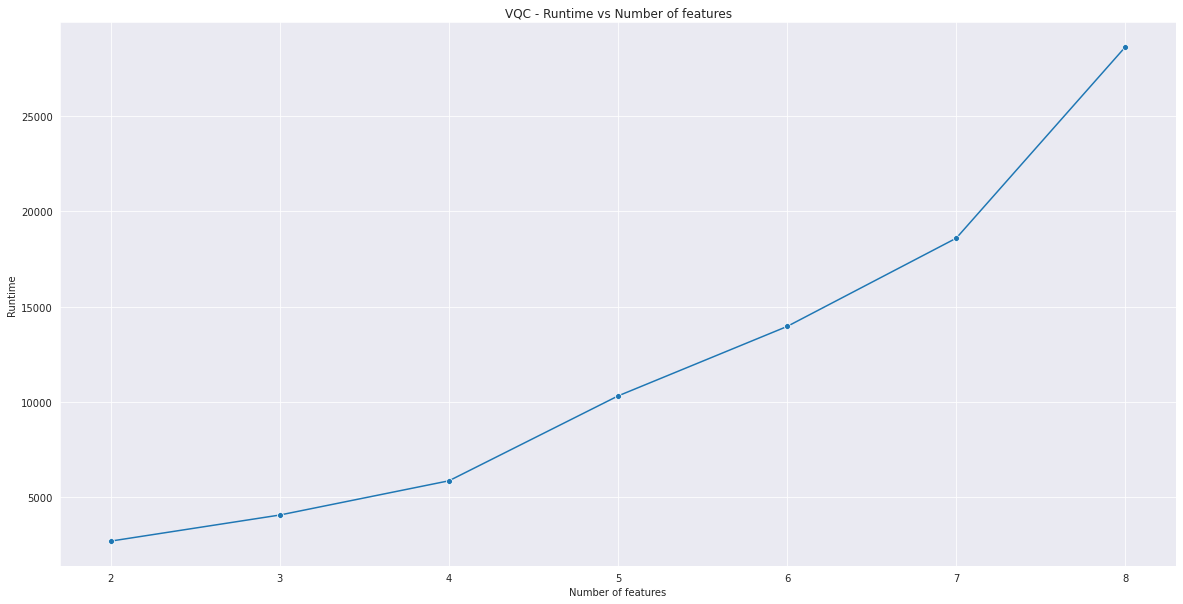

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "num_features", y = "runtime", data = vqc_feature_df, marker = "o")
#ax = axes[1]
plt.title("VQC - Runtime vs Number of features")
plt.ylabel("Runtime", fontsize=10)
plt.xlabel("Number of features", fontsize=10)
plt.show();

In [24]:
vqc_size_list = os.listdir("vqc_results/runtime_size/")
vqc_size_df = pd.DataFrame()
for data in vqc_size_list:
    if ".csv" in data:
        new_df = pd.read_csv("vqc_results/runtime_size/" + data)
        vqc_size_df = pd.concat([vqc_size_df, new_df], axis = 0).reset_index(drop=True)

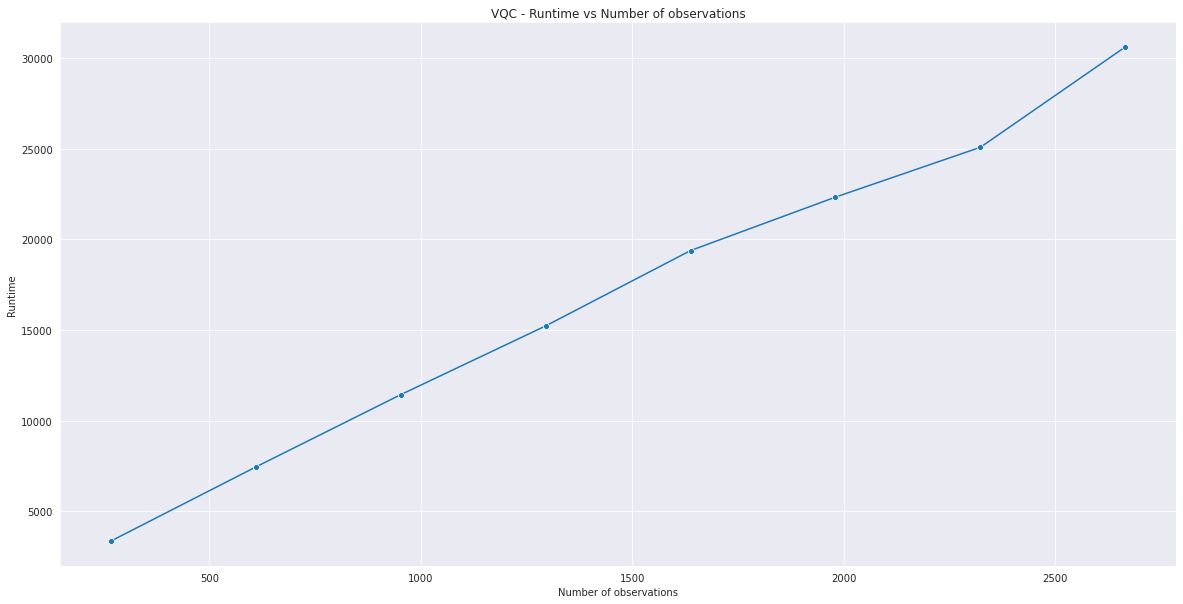

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "size", y = "runtime", data = vqc_size_df, marker="o")
#ax = axes[1]
plt.title("VQC - Runtime vs Number of observations")
plt.ylabel("Runtime", fontsize=10)
plt.xlabel("Number of observations", fontsize=10)
plt.show();